# Authorization

In [1]:
import requests
import json
import urllib
import urllib2

In [1]:
APP_ID = "YOUR APP ID"
APP_SECRET = "YOUR APP SECRET"

In [3]:
permission_url = "https://api.instagram.com/oauth/authorize/?client_id="+APP_ID+"&redirect_uri=https%3A//semihakbayrak.github.io&response_type=token"

In [2]:
#this access token is gotten after permission
access_token = "ACCESS TOKEN"

# Permissions and Sandbox Mode

All the permissions are allowed after some checking of app by Instagram. But instagram allows you to make development in sendbox mode which doesn't require any security checking.

# User

In [5]:
request_link = "https://api.instagram.com/v1/users/self/?access_token="+access_token
url = urllib.urlopen(request_link).read()
result = json.loads(url)

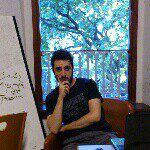

akbayraksemih
Semih
Following number: 125
Follower number: 91


In [6]:
#display profile image
from PIL import Image
from StringIO import StringIO
from IPython import display

img_url = result['data']['profile_picture']
f = urllib2.urlopen(img_url)
im = Image.open(StringIO(f.read()))
display.display(im)

print result['data']['username']
print result['data']['full_name']
print "Following number: "+ str(result['data']['counts']['follows'])
print "Follower number: "+ str(result['data']['counts']['followed_by'])

# Posts

In [7]:
request_link = "https://api.instagram.com/v1/users/self/media/recent/?access_token="+access_token
url = urllib.urlopen(request_link).read()
result = json.loads(url)

In [8]:
pic_last = result['data'][0]

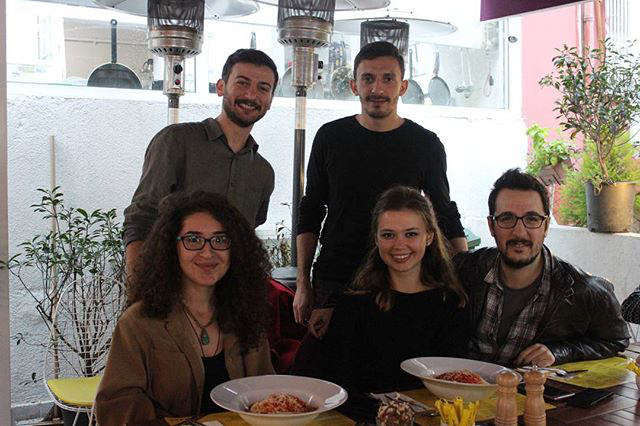

Kardeşim @mutiryaki 'nin de kurucuları arasında olduğu Sanat Tarihçileri Derneği'nin tanışma toplantısındaydık pazar günü. Güzel insanlarla güzel bir gün oldu. #satad #basbakansemih
Number of likers: 35


In [9]:
pic_url = pic_last['images']['standard_resolution']['url']
f = urllib2.urlopen(pic_url)
im = Image.open(StringIO(f.read()))
display.display(im)

print pic_last['caption']['text']
print "Number of likers: " + str(pic_last['likes']['count'])

## Likers of this post

In [10]:
pic_last_id = pic_last['id']
request_link = "https://api.instagram.com/v1/media/"+pic_last_id+"/likes?access_token="+access_token
url = urllib.urlopen(request_link).read()
result = json.loads(url)

In [11]:
print result

{u'meta': {u'code': 200}, u'data': []}


WARNING: This didn't work because we are working in sandbox mode. If we release an app, these features will all work.

# Relationship

## Followings

In [12]:
request_link = "https://api.instagram.com/v1/users/self/follows?access_token="+access_token
url = urllib.urlopen(request_link).read()
result = json.loads(url)

In [13]:
print result

{u'pagination': {}, u'meta': {u'code': 200}, u'data': []}


WARNING: this feature doesn't work in sandbox mode but works in application mode